## Lineal Regression

### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split.
from sklearn.model_selection import train_test_split

# Read in California housing dataset.
from sklearn.datasets import fetch_california_housing

# Import StandardScaler.
from sklearn.preprocessing import StandardScaler

# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score

# Import LinearRegression.
from sklearn.linear_model import LinearRegression

### Load dataset

In [3]:
housing = fetch_california_housing()

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
pd.DataFrame(housing.data)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

### Data Processing

In [7]:
# Create features X and target y.
X = pd.DataFrame(housing.data, columns=housing.feature_names)[["AveRooms"]]
y = housing.target  # Median house value in $100,000s

# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Instantiate StandardScaler.
scaler = StandardScaler()

# Fit and transform training data.
X_train_scaled = scaler.fit_transform(X_train)

# Also transform test data.
X_test_scaled = scaler.transform(X_test)

### Train Linear Regression model

In [9]:
# Instantiate linear regression model.
model = LinearRegression()

#### fit the model

In [10]:
# Fit the model to the training data.
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Make predictions

In [11]:
# Make predictions on the testing data.
y_pred = model.predict(X_test_scaled)

#### Model evaluation

In [12]:
# Calculate and print R^2 score.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.0138


In [13]:
# Calculate and print MSE.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

Mean squared error: 1.2923
Root mean squared error: 1.1368


## Evaluar el rendimiento del modelo


### __Coeficiente de determinación__

El coeficiente de determinación, denotado $R^2$, mide lo bien que un modelo de regresión explica la variabilidad de la variable objetivo. En otras palabras cuantifica qué parte de la variabilidad de la variable objetivo explican los predictores, lo que se le conoce como bondad de ajuste.

Para entenderlo mejor, se tiene la formula:

$$ R^2 = 1 - \frac{\sum(y_{actual} - y_{predicted})^2}{\sum(y_{actual} - \hat{y})^2} $$

Donde $y_{actual}$ son los valores reales de la variable objetivo, $y_{predicted}$ son los valores predichos del modelo, y $\hat{y}$ es la media de los valores reales. Está fomula nos ayuda a comprender cuánta varianza de la variable objetivo explica el modelo. El denominados representa la varianza total de los datos, mientras que el numerador representa la varianza no explicada tras aplicar el modelo de regresión. La relacion, por tanto, da el porcentaje de varianza explicada por el modelo.

* ¿Cómo interpretamos $R^2$?

* $R^2 = 1$: el modelo explica perfectamente toda la varianza de la variable objetivo. Un $R^2$ no siempre es mejor, ya que puede indicar un ajuste excesivo, especialmente con modelos complejos.
* $R^2 = 0$: el modelo __no__ explica nada de la varianza; las predicciones no son mejores que utilizar simplemente la media.
* $R^2 < 0$: el modelo funciona peor que utilizando simplemente la media. 

### __Error cuadrático medio__

Esta metrica mide cuanto se desvían las predicciones de un modelo de los valores reales.

El MSE calcula la diferencia cuadrática media entre los valores reales y los previstos:

$$ \frac{1}{n} \sum_{i=1}^n (y_{actual,i} - y_{predicted,i})^2$$

para el número total de observaciones $n$. Como los errores se elevan al cuadrado antes de promediar, los errores más grandes se penalizan más que los pequeños, lo que hace que el MSE sea sensible a valores atipicos. Un MSE menor indica un mejor ajuste del modelo.

Para resolver este problema, se utiliza el RMSE, que no es mas que la raíz cuadrada del MSE. Como el RMSE está en las mismas unidades que la variable objetivo, proporciona una medida más interpretable de cuánto se alejan las predicciones, pr término medio.

## Regresión lineal múltiple

R-squared: 0.5758
Mean squared error: 0.5559
Root mean squared error: 0.7456
Intercept: 2.0719469373788777

Feature Coefficients:
       Feature  Coefficient
0      MedInc     0.854383
1    HouseAge     0.122546
2    AveRooms    -0.294410
3   AveBedrms     0.339259
4  Population    -0.002308
5    AveOccup    -0.040829
6    Latitude    -0.896929
7   Longitude    -0.869842


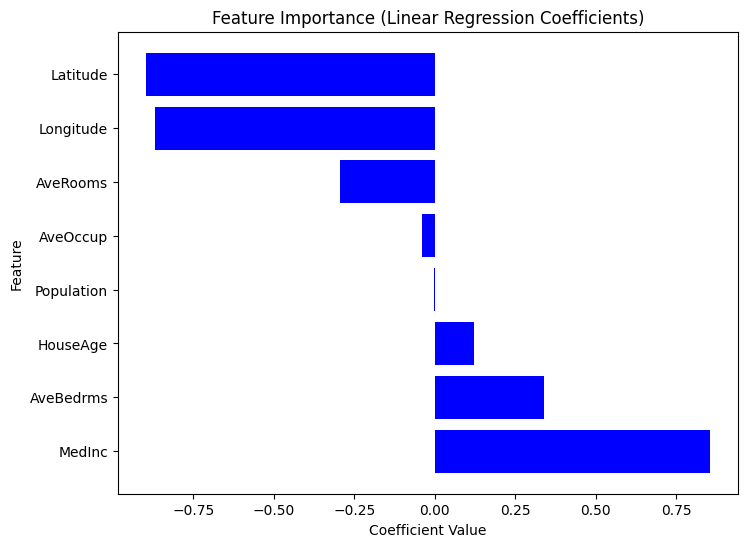

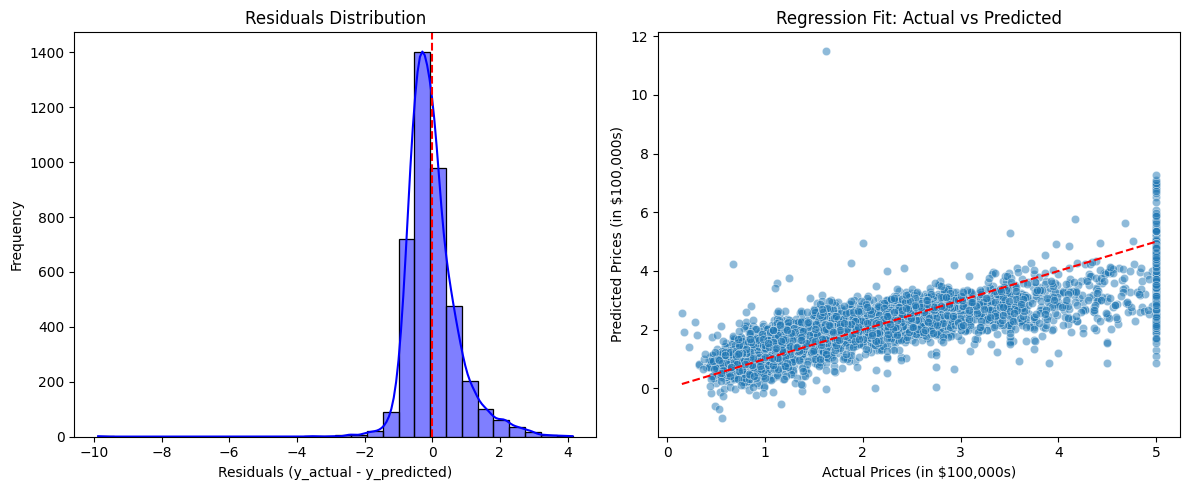

In [14]:
# Uses all features.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data set.
housing = fetch_california_housing()

# Split into X, y.
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # Median house value in $100,000s
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create model and fit it to the training data.
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions.
y_pred = model.predict(X_test_scaled)

# Calculate and print errors.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")

rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

# Extraer información del modelo
print("Intercept:", model.intercept_)
coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coef_df_sorted["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


#Residuos y ajuste de la regresión 
# Compute residuals.
residuals = y_test - y_pred

# Create plots.
plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices (in $100,000s)")
plt.ylabel("Predicted Prices (in $100,000s)")


# Show plots.
plt.tight_layout()
plt.show()

La distribución de los residuos (gráfico de la izquierda) debe estar centrada en torno a cero, lo que indica que los errores están distribuidos aleatoriamente. Si los residuos siguen una distribución normal, el modelo se ajusta bien, pero si hay asimetría o una tendencia, puede sugerir errores sistemáticos. El ajuste de regresión (gráfico de la derecha) compara los valores reales con los previstos, y la línea discontinua roja representa un ajuste perfecto. Si los puntos siguen de cerca la línea, las predicciones son exactas, pero si aparece un patrón (por ejemplo, una curva), puede que la relación no sea realmente lineal. 

## Factor de Infración de la Varianza

¿Hay características más relevantes que otras?

La selección de caracteristicas es importante por varias razones:

* __Reduce el sobreajuste.__ Menos características significan menos complejidad, reduciendo el riesgo de sobreajuste.
* __Mejora la precisión.__ Eliminar rasgos irrelevantes o redundantes resaltando los factores más importantes.
* __Mejora la interpretabilidad.__ Facilita la compresión de los modelos resaltando los factores mas importantes.

* __Acelera el entrenamiento.__ Reducir el número de funciones disminuye el tiempo de factores más importantes y el uso de memoria.

Cuando varias características están muy correlacionadas, son redundantes, lo que significa que están dando al modelo la misma información. Esta situación se denomina _multicolinealidad_. Aunque la multicolinealidad no siempre afecta a la precisión de todos los modelos predictivos, complica la selección e interpretación de las caracteristicas, sobre todo en la regresión lineal y modelos afines.

El factor de Inflación de la Varianza (VIF) es una métrica utilizada para detectar la multicolinealidad entre predictores. Para cada predictor, el VIF, se calcula como:

$$ VIF(X_i) = \frac{1}{1-R^2_1} $$

Donde $R^2_i$ es el valor $R^2$ obtenido cuando se hace la regresión del predictor $X_i$ frente a todos los demás predictores del modelo. Un VIF más alto sognifica que el predictor está miy correlacionado con otras variables:

* $VIF=1$: no hay multicolinealidad (escenario ideal).
* $VIF<5$: multicolinealidad de baja a moderada (generalmente aceptable).
* $VIF>5$: alta multicolinealidad (considerar la eliminación o combinación de variables correlacionadas).
* $VIF>10$: multicolinealidad grave (sugiere claramente redundancia de variables).

In [15]:
# Import libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Load the dataset.
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)


# Compute the correlation matrix.
corr_matrix = X.corr()


# Identify pairs of features with high collinearity (correlation > 0.8 or < -0.8).
high_corr_features = [(col1, col2, corr_matrix.loc[col1, col2])
                     for col1 in corr_matrix.columns
                     for col2 in corr_matrix.columns
                     if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]


# Convert to a DataFrame for better visualization.
collinearity_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
print("\nHighly Correlated Features:\n", collinearity_df)


# Compute Variance Inflation Factor (VIF) for each feature.
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Print VIF values.
print("\nVariance Inflation Factor (VIF) for each feature:\n", vif_data)


Highly Correlated Features:
    Feature 1  Feature 2  Correlation
0   AveRooms  AveBedrms     0.847621
1  AveBedrms   AveRooms     0.847621
2   Latitude  Longitude    -0.924664
3  Longitude   Latitude    -0.924664

Variance Inflation Factor (VIF) for each feature:
       Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


R-squared: 0.5823
Mean squared error: 0.5473
Root mean squared error: 0.7398
Intercept: 4.1003451254664345

Feature Coefficients:
       Feature  Coefficient
0      MedInc     5.393192
1    HouseAge     0.499415
2    AveRooms     2.695802
3  Population    -0.103717
4    AveOccup    -4.022844
5    Latitude    -4.304000
6   Longitude    -4.664299


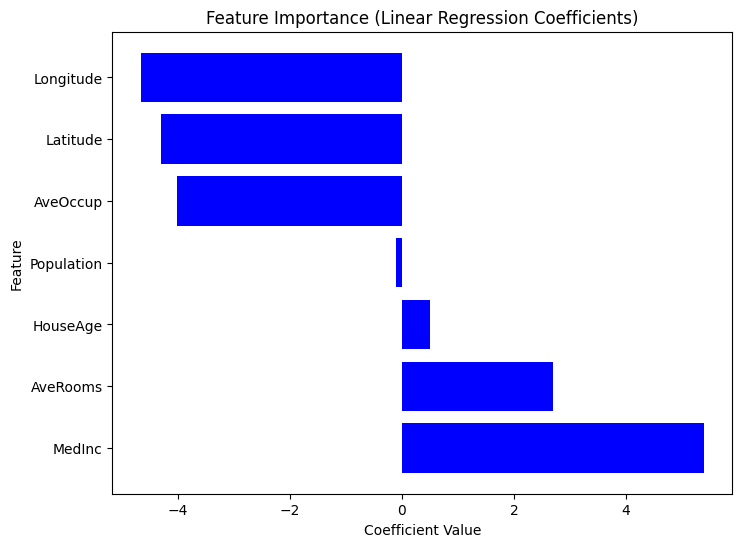

In [16]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load California housing dataset.
housing = fetch_california_housing()


# Create DataFrame and remove "AveBedrms" feature.
X = pd.DataFrame(housing.data, columns=housing.feature_names).drop(columns=["AveBedrms"])
y = housing.target  # Median house value in $100,000s


# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data (Standardization).
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a linear regression model and train it.
model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Make predictions on the test set.
y_pred = model.predict(X_test_scaled)


# Calculate performance metrics.
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Print evaluation metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")


# Extraer información del modelo
print("Intercept:", model.intercept_)
coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coef_df_sorted["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()